In [2]:
df = pd.read_csv('compressed_data.csv')
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,1,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,1,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,1,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,1,0,3


In [144]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [145]:
data = pd.read_csv("compressed_data.csv")

In [146]:
X = data.drop(columns=["Cover_Type"])
y = data["Cover_Type"] - 1 
num_classes = len(np.unique(y))
y_bin = label_binarize(y, classes=range(num_classes))

In [147]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.long)
y_test_torch = torch.tensor(y_test.values, dtype=torch.long)

In [150]:
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

In [151]:
input_size = X_train.shape[1]
hidden_size = 128
output_size = num_classes
model_torch = MLPModel(input_size, hidden_size, output_size)

In [152]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

In [153]:
epochs = 500
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 50 == 0:
        print(f"PyTorch - Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

PyTorch - Epoch 50/500, Loss: 0.7882556915283203
PyTorch - Epoch 100/500, Loss: 0.6532352566719055
PyTorch - Epoch 150/500, Loss: 0.6076260209083557
PyTorch - Epoch 200/500, Loss: 0.5754138231277466
PyTorch - Epoch 250/500, Loss: 0.544276237487793
PyTorch - Epoch 300/500, Loss: 0.5142114758491516
PyTorch - Epoch 350/500, Loss: 0.48944640159606934
PyTorch - Epoch 400/500, Loss: 0.4692593812942505
PyTorch - Epoch 450/500, Loss: 0.45178738236427307
PyTorch - Epoch 500/500, Loss: 0.4370145797729492


In [154]:
y_pred_torch = model_torch(X_test_torch).detach().numpy()
y_pred_torch_classes = np.argmax(y_pred_torch, axis=1)

accuracy_torch = accuracy_score(y_test, y_pred_torch_classes)
precision_torch = precision_score(y_test, y_pred_torch_classes, average='weighted', zero_division=1)
recall_torch = recall_score(y_test, y_pred_torch_classes, average='weighted', zero_division=1)
f1_torch = f1_score(y_test, y_pred_torch_classes, average='weighted', zero_division=1)

print(f"PyTorch Accuracy: {accuracy_torch:.4f}")
print(f"PyTorch Precision: {precision_torch:.4f}")
print(f"PyTorch Recall: {recall_torch:.4f}")
print(f"PyTorch F1 Score: {f1_torch:.4f}")

PyTorch Accuracy: 0.8173
PyTorch Precision: 0.8158
PyTorch Recall: 0.8173
PyTorch F1 Score: 0.8124


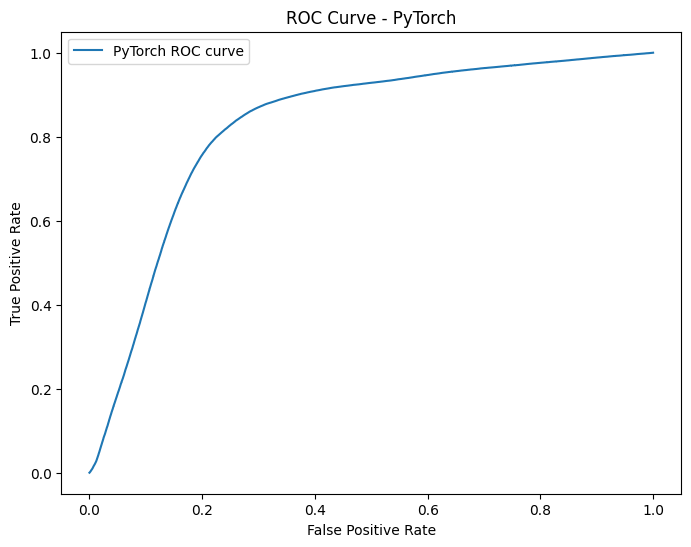

In [155]:
plt.figure(figsize=(8,6))
fpr, tpr, _ = roc_curve(y_bin[:len(y_test)].ravel(), y_pred_torch.ravel())
plt.plot(fpr, tpr, label="PyTorch ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PyTorch")
plt.legend()
plt.show()

In [156]:
tf_model = keras.Sequential([
    keras.Input(shape=(input_size,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(output_size, activation='softmax')
])

In [157]:
tf_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
tf_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1)

Epoch 1/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.7536 - loss: 0.5800
Epoch 2/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8373 - loss: 0.3893
Epoch 3/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8586 - loss: 0.3409
Epoch 4/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8710 - loss: 0.3123
Epoch 5/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8802 - loss: 0.2924
Epoch 6/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.8869 - loss: 0.2780
Epoch 7/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.8903 - loss: 0.2683
Epoch 8/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.8957 - loss: 0.2583
Epoch 9/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9000 - loss: 0.2492
Epoch 10/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9021 - loss: 0.2428
Epoch 11/500
14526/14526 ━━━━━━━━━━━━━━━━━━━━ 28s 2ms/step - accuracy: 0.9040 -

In [159]:
y_pred_tf_probs = tf_model.predict(X_test)
y_pred_tf = np.argmax(y_pred_tf_probs, axis=1)

accuracy_tf = accuracy_score(y_test, y_pred_tf)
precision_tf = precision_score(y_test, y_pred_tf, average='weighted', zero_division=1)
recall_tf = recall_score(y_test, y_pred_tf, average='weighted', zero_division=1)
f1_tf = f1_score(y_test, y_pred_tf, average='weighted', zero_division=1)

print(f"TensorFlow Accuracy: {accuracy_tf:.4f}")
print(f"TensorFlow Precision: {precision_tf:.4f}")
print(f"TensorFlow Recall: {recall_tf:.4f}")
print(f"TensorFlow F1 Score: {f1_tf:.4f}")

3632/3632 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
TensorFlow Accuracy: 0.9372
TensorFlow Precision: 0.9385
TensorFlow Recall: 0.9372
TensorFlow F1 Score: 0.9373


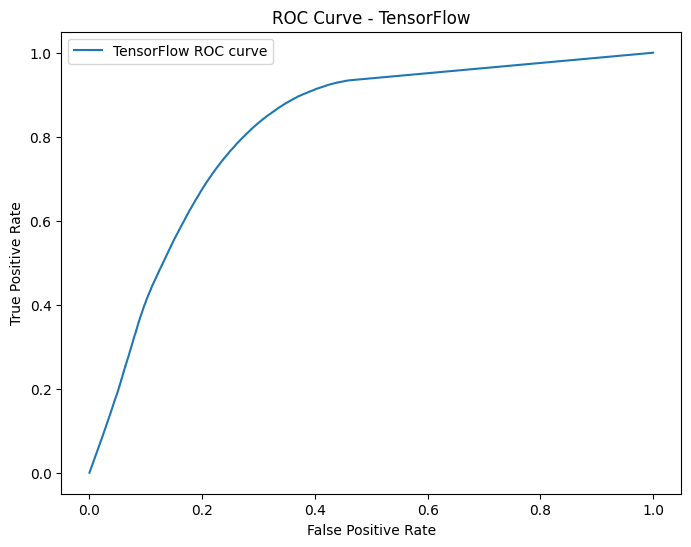

In [160]:
plt.figure(figsize=(8,6))
fpr, tpr, _ = roc_curve(y_bin[:len(y_test)].ravel(), y_pred_tf_probs.ravel())
plt.plot(fpr, tpr, label="TensorFlow ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - TensorFlow")
plt.legend()
plt.show()

# Analisis Perbandingan PyTorch dan TensorFlow dalam Klasifikasi Tutupan Lahan

## 1. Pendahuluan
Proyek ini bertujuan untuk mengklasifikasikan jenis tutupan lahan berdasarkan dataset yang diberikan menggunakan model Multi-Layer Perceptron (MLP). Model dilatih menggunakan dua framework deep learning yang populer, yaitu PyTorch dan TensorFlow.

Analisis ini mencakup perbandingan performa kedua framework berdasarkan metrik evaluasi, serta kelebihan dan kekurangan masing-masing pendekatan.

## 2. Arsitektur Model
Kedua model MLP memiliki struktur serupa dengan tiga lapisan:
- Input Layer: Berisi fitur-fitur dari dataset yang telah dinormalisasi.
- Hidden Layer: Dua lapisan dengan 128 neuron dan fungsi aktivasi ReLU.
- Output Layer: Sesuai dengan jumlah kelas dalam dataset, menggunakan aktivasi softmax.

## 2.1. Persamaan Matematika
1. Transformasi Input
   \[
   X' = \frac{X - \mu}{\sigma}
   \]
   di mana \( X \) adalah fitur asli, \( \mu \) adalah rata-rata fitur, dan \( \sigma \) adalah standar deviasi.

2. Lapisan Tersembunyi
   \[
   h = ReLU(W_1X' + b_1)
   \]
   dengan \( W_1 \) sebagai bobot, \( b_1 \) sebagai bias, dan fungsi aktivasi ReLU: \( ReLU(x) = \max(0, x) \).

3. Lapisan Output
   \[
   y = Softmax(W_2 h + b_2)
   \]
   dengan fungsi aktivasi Softmax:
   \[
   Softmax(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
   \]
   yang mengubah nilai menjadi probabilitas untuk setiap kelas.

## 3. Perbandingan Hasil
Setelah pelatihan selama 500 epochs, model dievaluasi menggunakan data uji, dan hasilnya sebagai berikut:

### 3.1. Hasil Evaluasi
| Metrik          | PyTorch  | TensorFlow |
|----------------|---------|------------|
| **Accuracy**   | 0.8173  | 0.9372     |
| **Precision**  | 0.8158  | 0.9385     |
| **Recall**     | 0.8173  | 0.9372     |
| **F1 Score**   | 0.8124  | 0.9373     |

Dari tabel di atas, terlihat bahwa model TensorFlow unggul di semua metrik dibandingkan model PyTorch.

## 4. Analisis Perbedaan Performa

### 4.1. Akurasi
Model TensorFlow mencapai akurasi 93.72%, sedangkan model PyTorch hanya 81.73%. Ini menunjukkan bahwa model TensorFlow lebih baik dalam mengklasifikasikan sampel uji dengan benar.

### 4.2. Precision dan Recall
- Precision (ketepatan klasifikasi positif) model TensorFlow lebih tinggi (93.85%) dibandingkan PyTorch (81.58%). Artinya, model TensorFlow lebih sedikit membuat kesalahan dalam mengklasifikasikan kategori tertentu.
- **Recall (kemampuan menangkap semua sampel positif) model TensorFlow juga lebih tinggi (93.72%) dibandingkan PyTorch (81.73%), menunjukkan bahwa model TensorFlow lebih mampu mengidentifikasi semua sampel dari setiap kelas dengan baik.

### 4.3. F1 Score
F1 Score adalah keseimbangan antara precision dan recall. Model TensorFlow mencetak 93.73%, jauh lebih tinggi dibandingkan model PyTorch yang hanya 81.24%. Ini menunjukkan bahwa model TensorFlow lebih konsisten dalam menangkap pola pada data.

### 5. Implementasi Model
- PyTorch dan TensorFlow memiliki cara yang berbeda dalam menangani propagasi balik (backpropagation) dan pembaruan bobot.
- Model TensorFlow dapat lebih optimal karena menggunakan kompiler grafis yang lebih baik dibandingkan PyTorch dalam memproses operasi matematis.

## 6. Kesimpulan
Berdasarkan hasil yang diperoleh, model yang dilatih menggunakan TensorFlow menunjukkan performa yang lebih baik dibandingkan model PyTorch dalam klasifikasi tutupan lahan. Model TensorFlow memiliki akurasi lebih tinggi, precision yang lebih baik, serta recall dan F1 Score yang lebih unggul.

Dari segi keunggulan framework:
- TensorFlow lebih optimal dalam menangani dataset ini, kemungkinan karena optimasi internal yang lebih baik.
- PyTorch tetap menjadi pilihan bagi yang membutuhkan fleksibilitas lebih tinggi dalam pengembangan model, meskipun dalam kasus ini performanya lebih rendah.

Dengan perbaikan lebih lanjut, model PyTorch mungkin dapat mencapai performa yang lebih baik dan mendekati model TensorFlow dalam tugas klasifikasi ini.

